In [101]:
import pandas as pd
import matplotlib.pyplot as plt


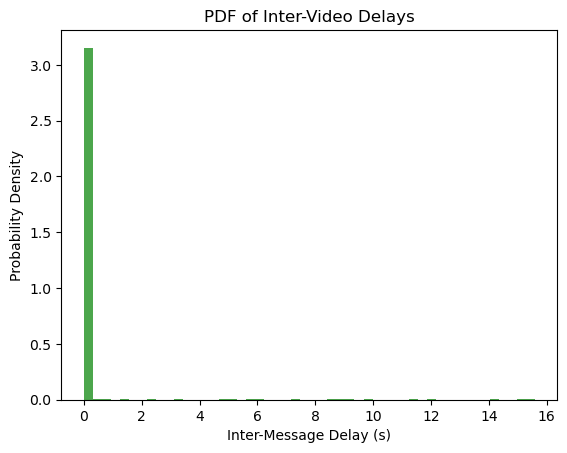

In [102]:
# Plot the PDF as a function of inter-message delays in orange
plt.hist(data_Video['Delay'].dropna(), bins=50, density=True, color='green', alpha=0.7)
plt.title('PDF of Inter-Video Delays')
plt.xlabel('Inter-Message Delay (s)')
plt.ylabel('Probability Density')
plt.show()

In [60]:
# Read the CSV file
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\Data_For_Network_Project\\MixTextVideo.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
# Filter rows containing "TCP" in the protocol column

data_Video

,Time,Source,Destination,Protocol,Length,Info
0,4.574620,10.0.2.15,157.240.0.60,TLSv1.2,124,Application Data
1,4.575098,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=1 Ack=71 Win=65535 Len=0
2,4.740392,157.240.0.60,10.0.2.15,TLSv1.2,126,Application Data
3,4.740450,10.0.2.15,157.240.0.60,TCP,54,56326 > 443 [ACK] Seq=71 Ack=73 Win=64022 Len=0
4,6.295326,10.0.2.15,157.240.0.60,TLSv1.2,118,Application Data
...,...,...,...,...,...,...
806,115.746863,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=8857 Ack=1641 Win=6553...
807,115.793791,10.0.2.15,157.240.0.60,TLSv1.2,156,Application Data
808,115.794387,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=8857 Ack=1743 Win=6553...
809,115.988090,157.240.0.60,10.0.2.15,TLSv1.2,143,Application Data


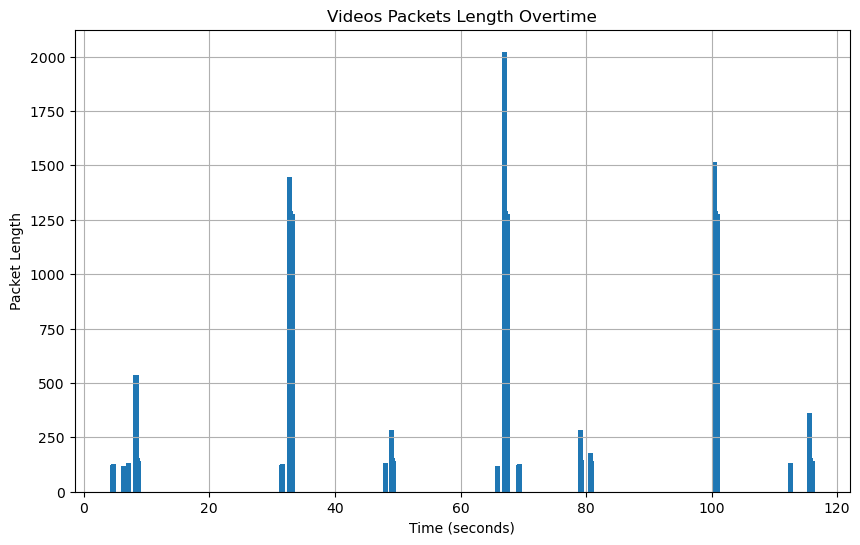

In [61]:
# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])

# Extract the "Length" column and calculate the Ethernet payload lengths
data_Video_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Video_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Videos Packets Length Overtime')
plt.grid(True)
plt.show()

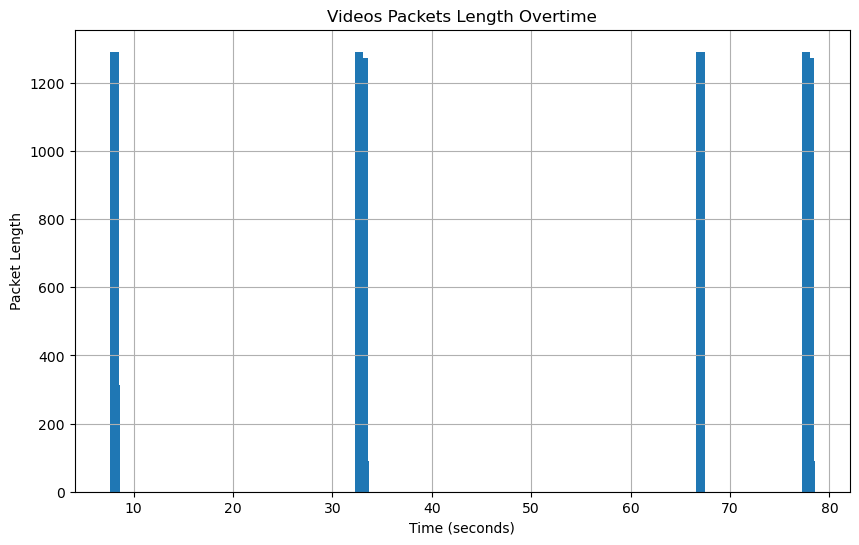

In [68]:
# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])
data_Video =data_Video[data_Video['Protocol'] == 'QUIC']
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Video_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Video_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Videos Packets Length Overtime')
plt.grid(True)
plt.show()

In [65]:
# Read the CSV file
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\Data_For_Network_Project\\MixTIV.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
# Filter rows containing "TCP" in the protocol column

data_Video

,Time,Source,Destination,Protocol,Length,Info
0,0.000000,10.0.2.15,157.240.0.60,TLSv1.2,124,Application Data
1,0.000605,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=1 Ack=71 Win=65535 Len=0
2,0.161704,157.240.0.60,10.0.2.15,TLSv1.2,126,Application Data
3,0.161740,10.0.2.15,157.240.0.60,TCP,54,56326 > 443 [ACK] Seq=71 Ack=73 Win=62780 Len=0
4,6.165160,157.240.0.60,10.0.2.15,TLSv1.2,285,Application Data
...,...,...,...,...,...,...
573,92.707530,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=11382 Ack=2211 Win=655...
574,92.769408,10.0.2.15,157.240.0.60,TLSv1.2,157,Application Data
575,92.769784,157.240.0.60,10.0.2.15,TCP,60,443 > 56326 [ACK] Seq=11382 Ack=2314 Win=655...
576,92.933642,157.240.0.60,10.0.2.15,TLSv1.2,144,Application Data


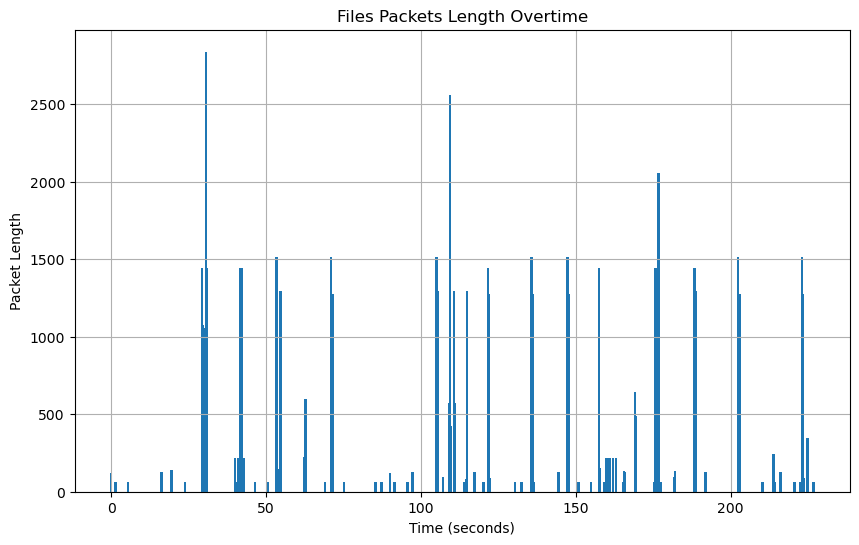

In [66]:
# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Files['Time'] = pd.to_numeric(data_Files['Time'])

# Extract the "Length" column and calculate the Ethernet payload lengths
data_Files_Length = data_Files['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Files['Time'], data_Files_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

In [89]:
# Read the CSV file
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\TextOnly.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = data_Video['Time'].diff()

data_Video

,Time,Source,Destination,Protocol,Length,Info,Delay
0,1.102847,10.0.2.15,157.240.0.60,TLSv1.2,118,Application Data,NaN
1,1.103760,157.240.0.60,10.0.2.15,TCP,60,443 > 34064 [ACK] Seq=1 Ack=65 Win=65535 Len=0,0.000913
2,1.271518,157.240.0.60,10.0.2.15,TLSv1.2,112,Application Data,0.167758
3,1.315552,10.0.2.15,157.240.0.60,TCP,54,34064 > 443 [ACK] Seq=65 Ack=59 Win=64022 Len=0,0.044035
4,3.424214,10.0.2.15,157.240.0.60,TLSv1.2,157,Application Data,2.108662
...,...,...,...,...,...,...,...
154,170.188615,10.0.2.15,157.240.0.60,TCP,54,40110 > 443 [ACK] Seq=3982 Ack=1719 Win=6402...,0.000082
155,179.769983,157.240.0.60,10.0.2.15,TLSv1.2,333,Application Data,9.581367
156,179.770064,10.0.2.15,157.240.0.60,TCP,54,34064 > 443 [ACK] Seq=4261 Ack=5613 Win=6402...,0.000082
157,180.289222,10.0.2.15,157.240.0.60,TLSv1.2,145,Application Data,0.519157


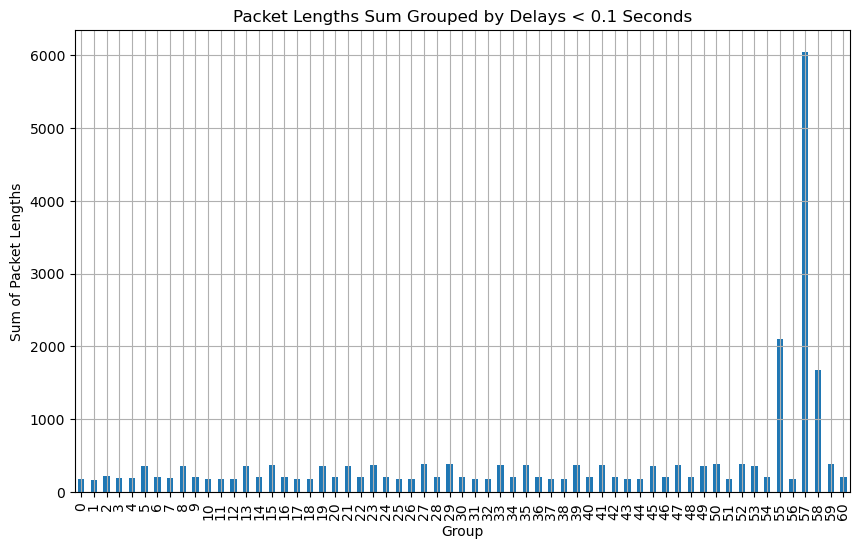

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\TextOnly.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()

# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')
plt.grid(True)
plt.show()


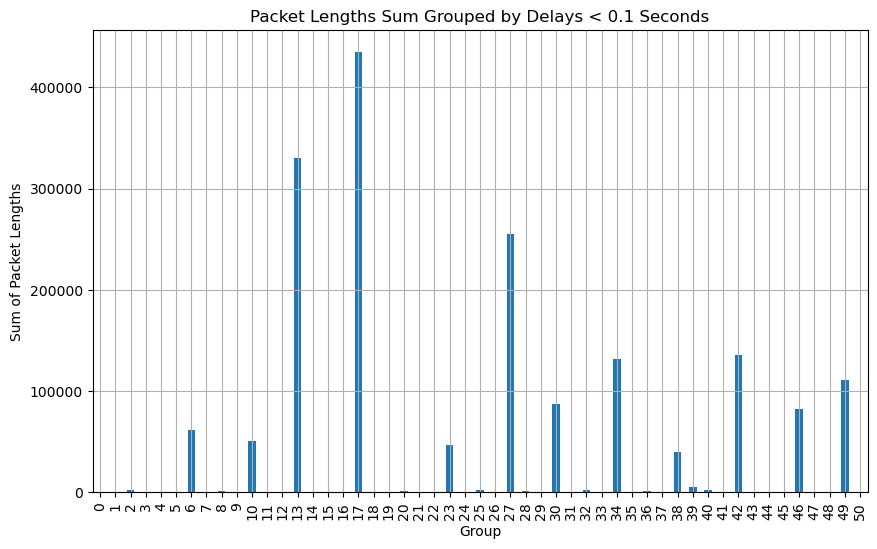

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\Images.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()

# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')
plt.grid(True)
plt.show()

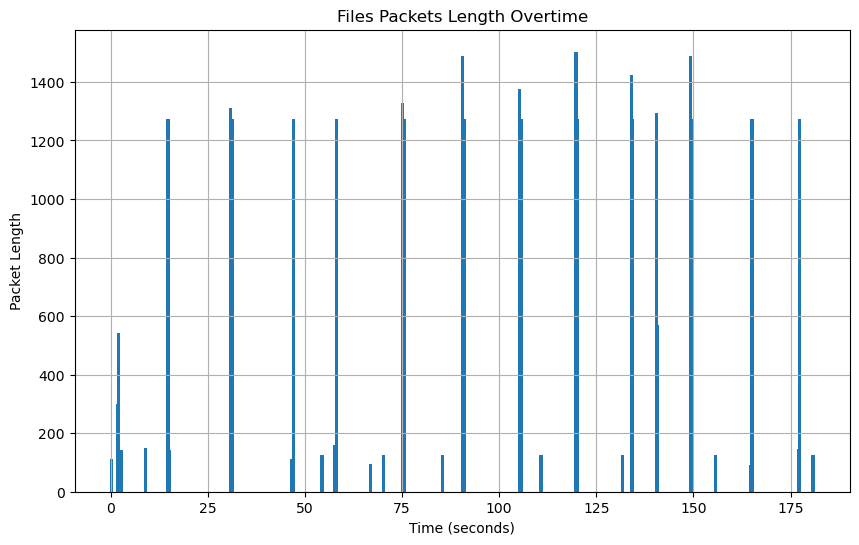

In [100]:
# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Files_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Files_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

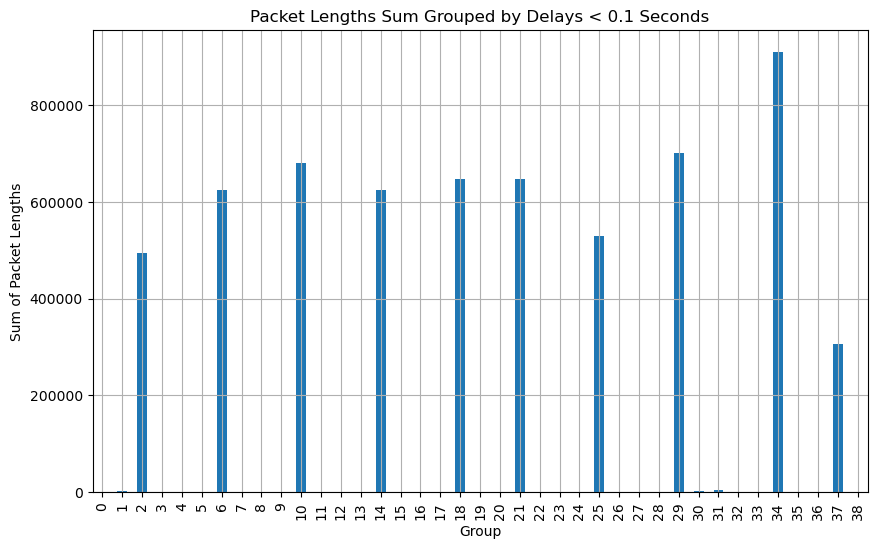

In [106]:
# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\Files.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()

# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')
plt.grid(True)
plt.show()

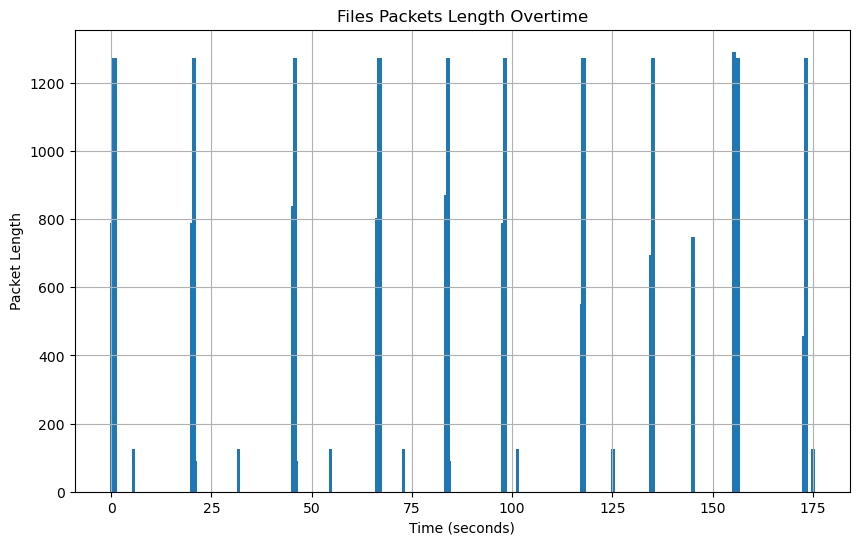

In [104]:
# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Files_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Files_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

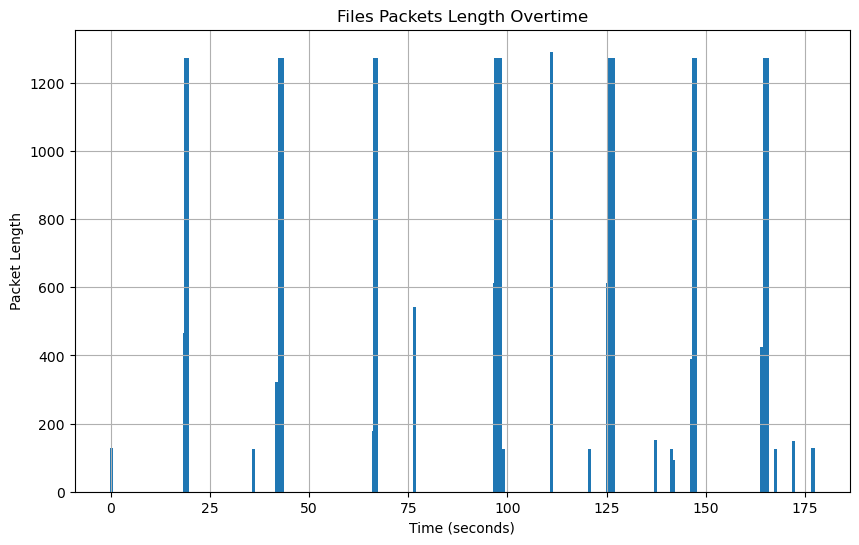

In [110]:
# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\Video.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()

# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Files_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Files_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

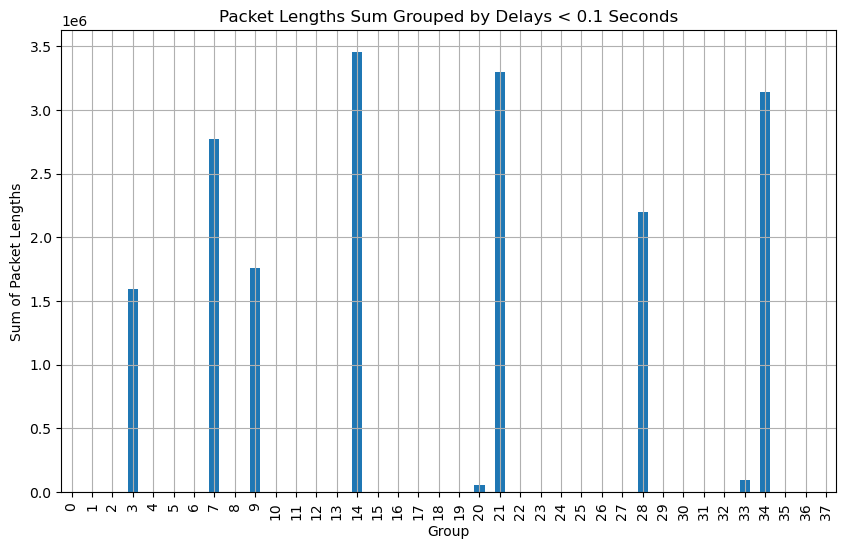

In [111]:

# Set the threshold interval
threshold = 0.1  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')
plt.grid(True)
plt.show()

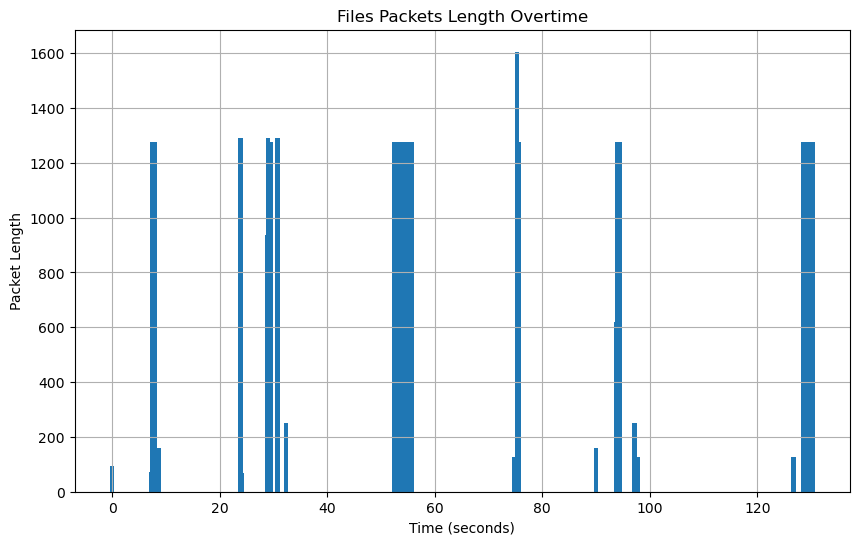

In [112]:
# Read the CSV file into a DataFrame
data_Video = pd.read_csv('C:\\Users\\USER\\Desktop\\CsvFiles\\MixTest.csv')
data_Video = data_Video.drop(['No.'] , axis=1)
data_Video['Delay'] = pd.to_numeric(data_Video['Time']).diff()

# Assuming you have a DataFrame named 'data'
# Convert 'Time' column to numeric (seconds)
data_Video['Time'] = pd.to_numeric(data_Video['Time'])
# Extract the "Length" column and calculate the Ethernet payload lengths
data_Files_Length = data_Video['Length']  # Subtract Ethernet header length (14 bytes)

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(data_Video['Time'], data_Files_Length)  # Use 'Time' column for x-axis
plt.xlabel('Time (seconds)')  # Set x-axis label
plt.ylabel('Packet Length')
plt.title('Files Packets Length Overtime')
plt.grid(True)
plt.show()

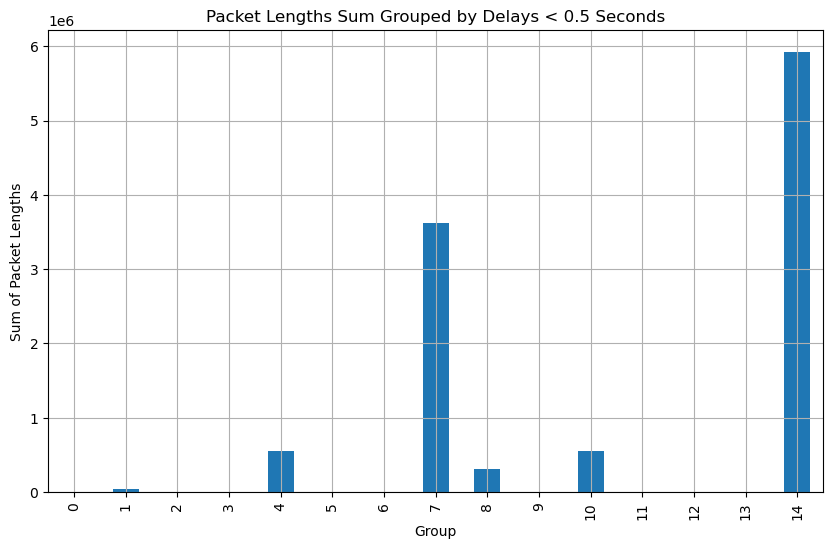

In [114]:
# Set the threshold interval
threshold = 0.5  # seconds

# Group the data by delay intervals and sum the packet lengths
data_grouped = data_Video.groupby(data_Video['Delay'].gt(threshold).cumsum())['Length'].sum()

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data_grouped.plot(kind='bar', x=data_grouped.index, y=data_grouped.values)
plt.xlabel('Group')
plt.ylabel('Sum of Packet Lengths')
plt.title(f'Packet Lengths Sum Grouped by Delays < {threshold} Seconds')
plt.grid(True)
plt.show()